In [ ]:
# Now the imports and pipeline
!pip install tensorflow
!pip install yfinance
!pip install nbformat
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from math import sqrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import datetime as dt
import nbformat



In [ ]:

# Download Tata Motors data from Yahoo Finance
stock = 'TATAMOTORS.NS'
start = dt.datetime(2015,1,1)
end = dt.datetime.now()

df = yf.download(stock, start=start, end=end)
print('Downloaded rows:', len(df))
df = df[['Open','High','Low','Close','Volume']].dropna()
df.tail()



/tmp/ipython-input-3631237318.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Downloaded rows: 2638


Price,Open,High,Low,Close,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
Date,,,,,
2025-09-01,671.299988,691.500000,670.549988,690.150024,7644947
2025-09-02,690.150024,694.650024,681.650024,684.400024,7854694
2025-09-03,688.000000,693.450012,685.000000,692.049988,6094892
2025-09-04,705.900024,706.349976,685.700012,687.500000,13439418
2025-09-05,690.900024,697.349976,683.099976,691.700012,6692975


In [ ]:
df.head()


Price,Open,High,Low,Close,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
Date,,,,,
2015-01-01,481.891621,486.715401,479.698977,485.740906,944551
2015-01-02,484.571497,504.207751,484.571497,498.750519,4193093
2015-01-05,497.093878,512.588438,493.780565,510.444550,6758676
2015-01-06,501.235492,501.235492,486.520498,488.615692,7979598
2015-01-07,482.378878,487.641181,476.726748,481.258209,9232656


In [ ]:
df.tail()

Price,Open,High,Low,Close,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
Date,,,,,
2025-09-01,671.299988,691.500000,670.549988,690.150024,7644947
2025-09-02,690.150024,694.650024,681.650024,684.400024,7854694
2025-09-03,688.000000,693.450012,685.000000,692.049988,6094892
2025-09-04,705.900024,706.349976,685.700012,687.500000,13439418
2025-09-05,690.900024,697.349976,683.099976,691.700012,6692975


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2638 entries, 2015-01-01 to 2025-09-05
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   (Open, TATAMOTORS.NS)    2638 non-null   float64
 1   (High, TATAMOTORS.NS)    2638 non-null   float64
 2   (Low, TATAMOTORS.NS)     2638 non-null   float64
 3   (Close, TATAMOTORS.NS)   2638 non-null   float64
 4   (Volume, TATAMOTORS.NS)  2638 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 123.7 KB


In [ ]:
df.isnull().sum()

,,0
Price,Ticker,
Open,TATAMOTORS.NS,0
High,TATAMOTORS.NS,0
Low,TATAMOTORS.NS,0
Close,TATAMOTORS.NS,0
Volume,TATAMOTORS.NS,0


In [ ]:
df.describe()

Price,Open,High,Low,Close,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
count,2638.000000,2638.000000,2638.000000,2638.000000,2.638000e+03
mean,432.073855,437.491457,425.529825,431.150141,2.267322e+07
std,227.837108,229.669266,225.118725,227.264062,2.916106e+07
min,65.526052,65.920201,62.569994,64.343636,0.000000e+00
25%,286.171482,292.576307,280.887550,285.173820,7.526330e+06
50%,416.583132,420.179678,410.892684,415.538269,1.223811e+07
75%,523.613503,531.953672,515.525029,524.866119,2.511913e+07
max,1157.051852,1168.949630,1135.536938,1151.945801,3.905778e+08


In [ ]:
df.columns

MultiIndex([(  'Open', 'TATAMOTORS.NS'),
            (  'High', 'TATAMOTORS.NS'),
            (   'Low', 'TATAMOTORS.NS'),
            ( 'Close', 'TATAMOTORS.NS'),
            ('Volume', 'TATAMOTORS.NS')],
           names=['Price', 'Ticker'])

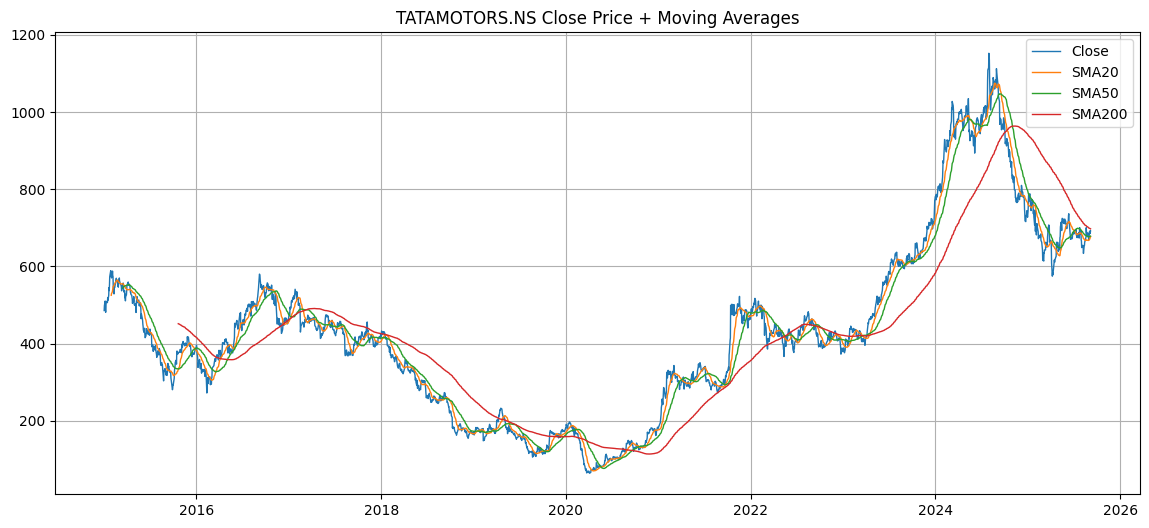

In [ ]:
# Exploratory data analysis - plot Close and moving averages
df['SMA20'] = df['Close'].rolling(20).mean()
df['SMA50'] = df['Close'].rolling(50).mean()
df['SMA200'] = df['Close'].rolling(200).mean()

plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close', linewidth=1)
plt.plot(df['SMA20'], label='SMA20', linewidth=1)
plt.plot(df['SMA50'], label='SMA50', linewidth=1)
plt.plot(df['SMA200'], label='SMA200', linewidth=1)
plt.title(f'{stock} Close Price + Moving Averages')
plt.legend(); plt.grid(True)

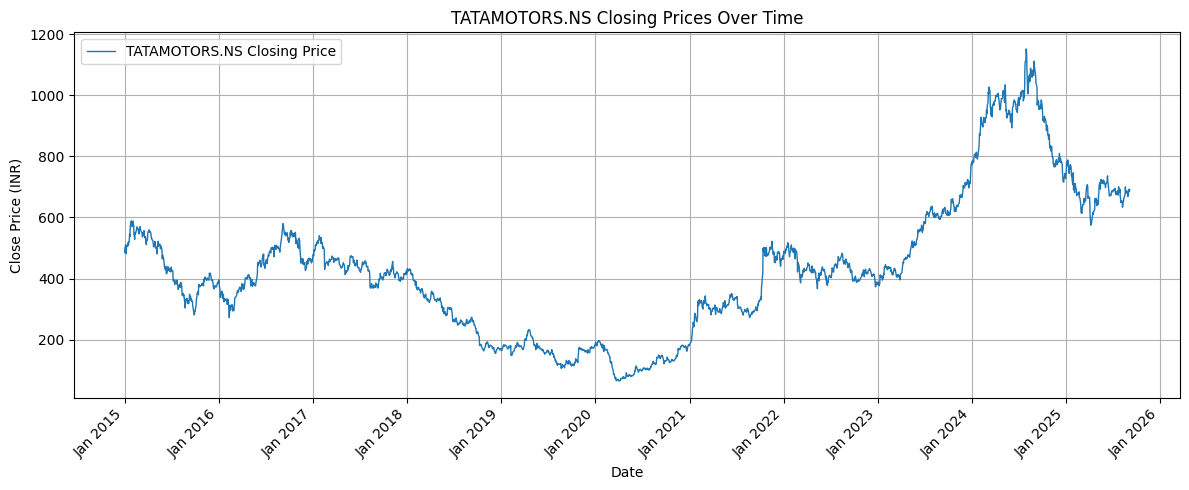

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12,5))
plt.plot(df['Close'], label=f'{stock} Closing Price', linewidth=1)

plt.title(f'{stock} Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.grid(True)
plt.legend()

# Format x-axis to display real dates
plt.gca().xaxis.set_major_locator(mdates.YearLocator())                  # tick every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))       # format as "Jan 2020"
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



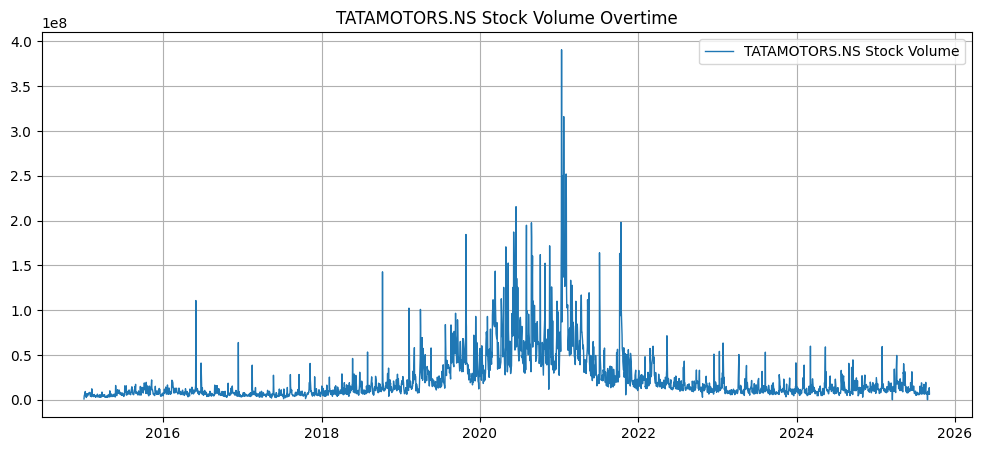

In [ ]:
plt.figure(figsize=(12,5))
plt.title(f'{stock} Stock Volume Overtime')
plt.grid(True)
plt.plot(df['Volume'], label = f'{stock} Stock Volume', linewidth = 1)
plt.legend()
plt.show()

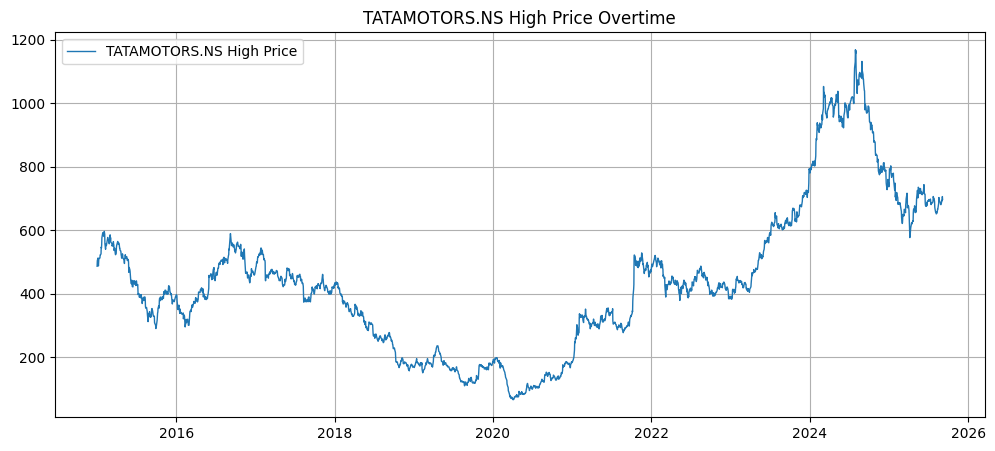

In [ ]:
plt.figure(figsize=(12,5))
plt.title(f'{stock} High Price Overtime')
plt.grid(True)
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
# Preprocessing - Univariate LSTM using 'Close' price
series = df[['Close']].copy()
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(series.values)  # shape (n,1)

In [ ]:

SEQ_LEN = 100  # lookback window (days)
def create_sequences_univariate(data, seq_len):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i, 0])
        y.append(data[i, 0])
    X = np.array(X)
    y = np.array(y)
    X = X.reshape((X.shape[0], X.shape[1], 1))
    return X, y

X, y = create_sequences_univariate(scaled, SEQ_LEN)
print('X shape:', X.shape, 'y shape:', y.shape)

# Train-test split (time-series split — no shuffling)
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
print('Train samples:', X_train.shape[0], 'Test samples:', X_test.shape[0])

X shape: (2538, 100, 1) y shape: (2538,)
Train samples: 2030 Test samples: 508


In [ ]:
# Train-test split (80/20)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
print("Train shape:", X_train.shape, y_train.shape, "Test shape:", X_test.shape, y_test.shape)


Train shape: (2030, 100, 1) (2030,) Test shape: (508, 100, 1) (508,)


In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train model (keep epochs modest so it runs here)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)


Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - loss: 0.0130 - val_loss: 9.1460e-04
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - loss: 9.5932e-04 - val_loss: 9.8064e-04
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - loss: 8.2637e-04 - val_loss: 0.0018
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - loss: 6.8825e-04 - val_loss: 9.5025e-04
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - loss: 5.8630e-04 - val_loss: 0.0027
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 5.2216e-04 - val_loss: 0.0012
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 4.7750e-04 - val_loss: 6.8894e-04
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - loss: 4.8132e-04 - val_loss: 8.9644e-04
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 4.3101e-04 - val_loss: 6.7001e-04
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 3.9928e-04 - val_loss: 0.0017
Epoch 11/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - loss: 3.8663e-04 - val

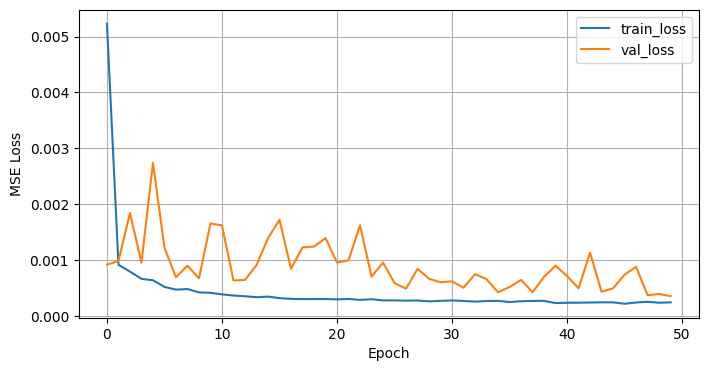

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch'); plt.ylabel('MSE Loss'); plt.legend(); plt.grid(True)

In [ ]:
# Predict on test set and inverse-transform to original price scale
preds = model.predict(X_test)
preds_unscaled = scaler.inverse_transform(preds.reshape(-1,1))
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1,1))

from math import sqrt
rmse = sqrt(mean_squared_error(y_test_unscaled, preds_unscaled))
mape = mean_absolute_percentage_error(y_test_unscaled, preds_unscaled)
print(f'Test RMSE: {rmse:.4f} INR')
print(f'Test MAPE: {mape*100:.2f} %')



16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
Test RMSE: 20.3566 INR
Test MAPE: 1.80 %


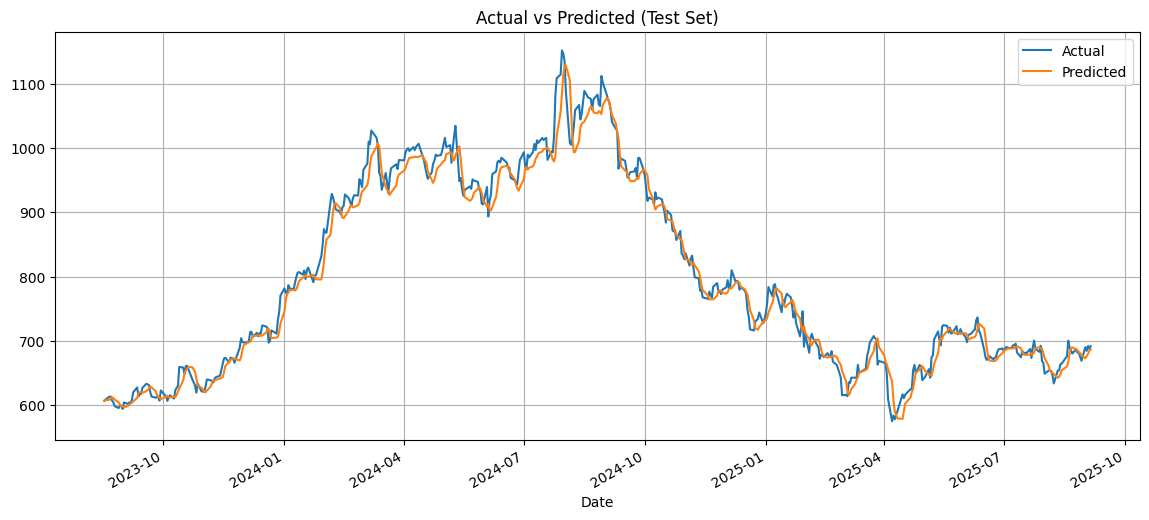

In [ ]:
# Build a DataFrame of predictions indexed by date for plotting
test_start_idx = len(series) - len(y_test_unscaled)  # index in original series where test targets begin (close-aligned)
pred_index = series.index[test_start_idx:]
results = pd.DataFrame({'Actual': y_test_unscaled.ravel(), 'Predicted': preds_unscaled.ravel()}, index=pred_index)
results[['Actual','Predicted']].plot(figsize=(14,6)); plt.title('Actual vs Predicted (Test Set)'); plt.grid(True)

In [ ]:
# 10-day rolling forecast (univariate close-only model)
n_forecast = 10
last_seq = scaled[-SEQ_LEN:].reshape(1, SEQ_LEN, 1)  # last available sequence
forecast_scaled = []

cur_seq = last_seq.copy()
for _ in range(n_forecast):
    next_scaled = model.predict(cur_seq)[0,0]
    forecast_scaled.append(next_scaled)
    # shift and append
    cur_seq = np.roll(cur_seq, -1)
    cur_seq[0, -1, 0] = next_scaled

forecast_unscaled = scaler.inverse_transform(np.array(forecast_scaled).reshape(-1,1)).ravel()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


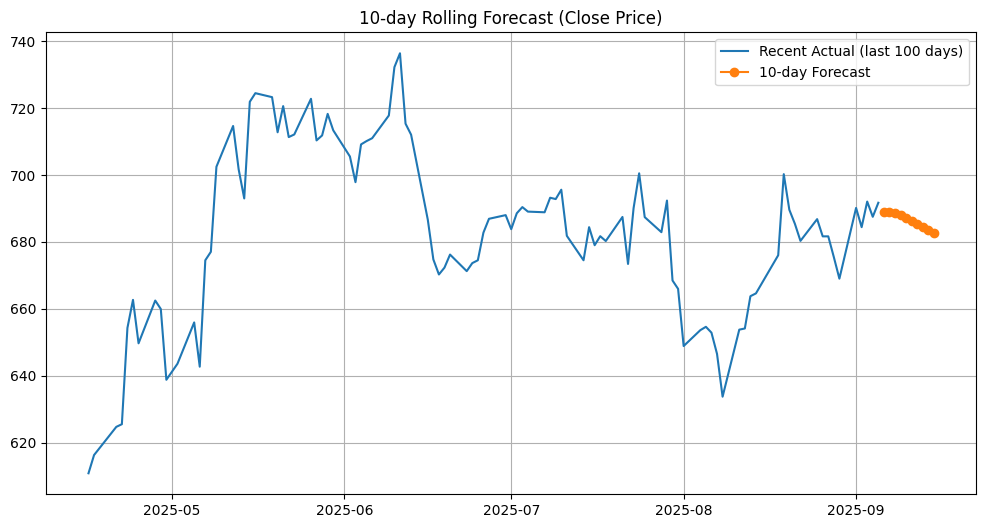

In [ ]:
# Plot forecast alongside last 100 days of real close
plt.figure(figsize=(12,6))
plt.plot(df['Close'].iloc[-100:], label='Recent Actual (last 100 days)')
plt.plot(pd.date_range(df.index[-1]+pd.Timedelta(days=1), periods=n_forecast), forecast_unscaled, label='10-day Forecast', marker='o')
plt.title('10-day Rolling Forecast (Close Price)'); plt.legend(); plt.grid(True)